<a href="https://colab.research.google.com/github/CODSOFT-DS/Task-4/blob/main/sales_prediction_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy
from scipy.stats import skew
from scipy.stats import kurtosis
import pylab as p
import statsmodels.api as sm

In [ ]:
df = pd.read_csv("sales.csv")


In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
rows,columns = df.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 200
Number of columns: 4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
print("skewness")
print("tv")
print(round(skew(df['TV'], axis=0, bias=True),3)) # Access the 'TV' column using df['TV']
print("radio")
print(round(skew(df['Radio'], axis=0, bias=True),3)) # Access the 'Radio' column using df['Radio']
print("newspaper")
print(round(skew(df['Newspaper'], axis=0, bias=True),3)) # Access the 'Newspaper' column using df['Newspaper']
print("sales")
# Check if the column name is 'Sales' instead of 'sales'
print(round(skew(df['Sales'], axis=0, bias=True),3)) # Access the 'sales' column using df['Sales']

skewness
tv
-0.069
radio
0.093
newspaper
0.888
sales
-0.073


In [ ]:
print("Kurtosis")
print("tv")
print(round(kurtosis(df['TV'], axis=0, bias=True),3)) # Access the 'TV' column using df['TV']
print("radio")
print(round(kurtosis(df['Radio'], axis=0, bias=True),3)) # Access the 'Radio' column using df['Radio']
print("newspaper")
print(round(kurtosis(df['Newspaper'], axis=0, bias=True),3)) # Access the 'Newspaper' column using df['Newspaper']
print("sales")
# Check if the column name is 'Sales' instead of 'sales'
print(round(kurtosis(df['Sales'], axis=0, bias=True),3)) # Access the 'sales' column using df['Sales']

Kurtosis
tv
-1.226
radio
-1.259
newspaper
0.604
sales
-0.654


Data Cleaning


In [ ]:
df.isnull().sum()*100/len(df)

,0
TV,0.0
Radio,0.0
Newspaper,0.0
Sales,0.0


Visualization

<Axes: ylabel='Sales'>

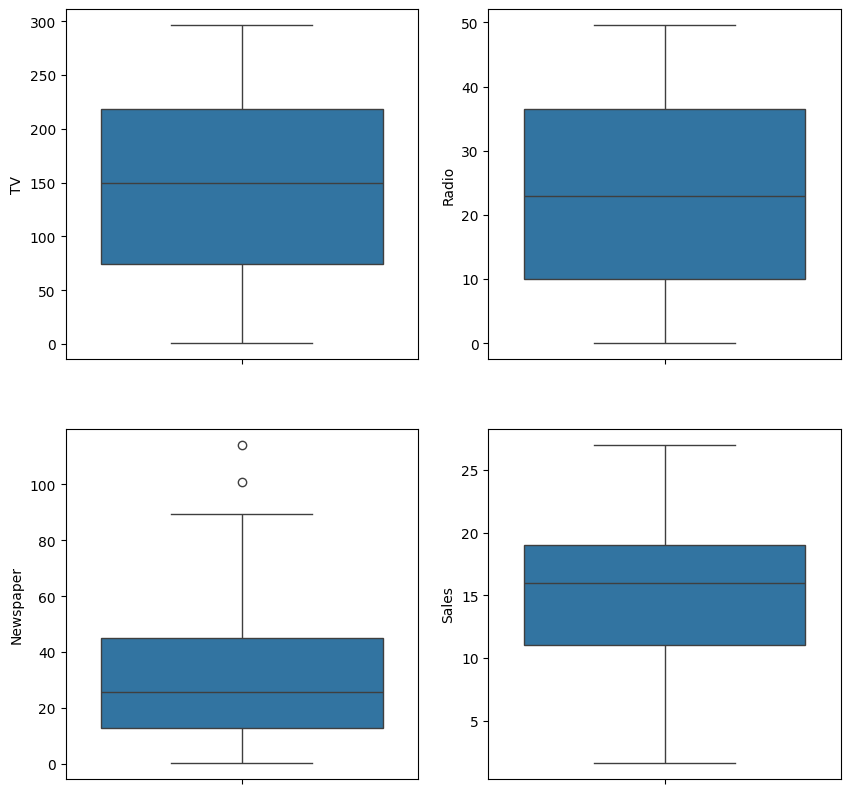

In [ ]:
fig,axs = plt.subplots(2,2,figsize=(10,10))
sns.boxplot(df['TV'],ax=axs[0,0])
sns.boxplot(df['Radio'],ax=axs[0,1])
sns.boxplot(df['Newspaper'],ax=axs[1,0])
sns.boxplot(df['Sales'],ax=axs[1,1])

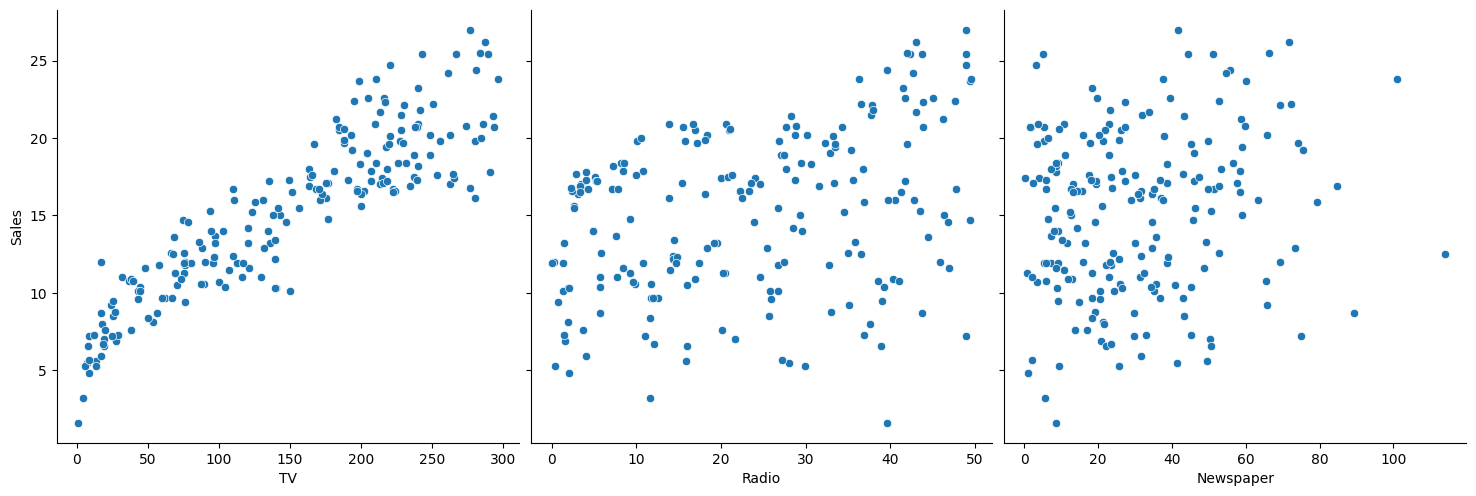

In [ ]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=5,aspect=1,kind='scatter')

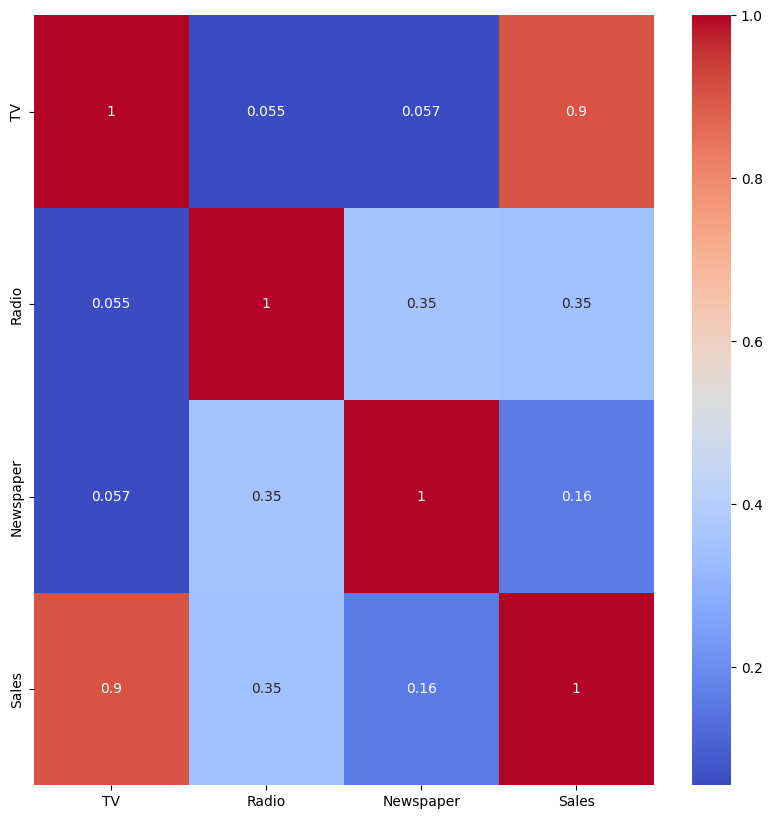

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [ ]:
x=df['TV']
y=df['Sales']


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
#

Preprocessing

In [ ]:
x_train.head()

,TV
74,213.4
3,151.5
185,205.0
26,142.9
90,134.3


In [ ]:
y_train.head()

,Sales
74,17.0
3,16.5
185,22.6
26,15.0
90,14.0


In [ ]:
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()
lr.params

,0
const,6.948683
TV,0.054546


In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           1.52e-52
Time:                        06:26:31   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

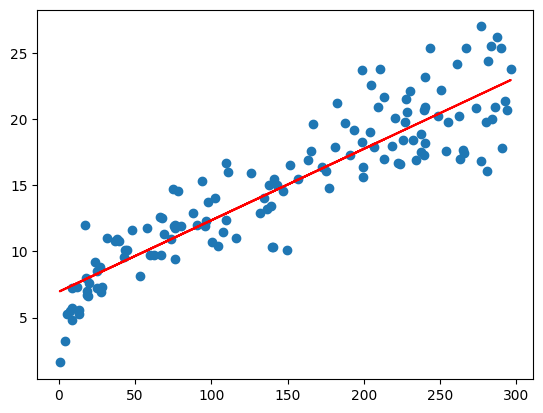

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.948+0.054*x_train,'r')
plt.show()